# Qianyu Shang

## Which item is most commonly used at the grand master level in TFT game?

My research question is to find the item most popular(commonly used) in the TFT game among the grand master level players.

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import ast


In [2]:
myDatabase = pd.read_csv('../data/raw/TFT_GrandMaster_MatchData.csv')
myDatabase

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4254769102,2319.661377,9,38,1,2311.472168,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
1,KR_4254769102,2319.661377,9,38,2,2311.472168,"{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, '...","{'Fiora': {'items': [], 'star': 2}, 'Leona': {..."
2,KR_4254769102,2319.661377,9,37,3,2247.994873,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [], 'star': 3}, 'Sona':..."
3,KR_4254769102,2319.661377,7,33,4,1996.358643,"{'DarkStar': 2, 'Demolitionist': 1, 'Infiltrat...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."
4,KR_4254769102,2319.661377,8,31,5,1871.789551,"{'Chrono': 1, 'Cybernetic': 1, 'DarkStar': 3, ...","{'Leona': {'items': [], 'star': 1}, 'Mordekais..."
...,...,...,...,...,...,...,...,...
79995,KR_4365780453,1957.781738,8,33,4,1765.595581,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Graves..."
79996,KR_4365780453,1957.781738,8,33,5,1764.012573,"{'Blaster': 2, 'Chrono': 2, 'Demolitionist': 2...","{'Blitzcrank': {'items': [67], 'star': 2}, 'Ru..."
79997,KR_4365780453,1957.781738,8,31,6,1664.981812,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 1}, 'Graves..."
79998,KR_4365780453,1957.781738,8,28,7,1515.034302,"{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 3, '...","{'Malphite': {'items': [], 'star': 2}, 'Graves..."


In [3]:
myDatabase.head()

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4254769102,2319.661377,9,38,1,2311.472168,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
1,KR_4254769102,2319.661377,9,38,2,2311.472168,"{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, '...","{'Fiora': {'items': [], 'star': 2}, 'Leona': {..."
2,KR_4254769102,2319.661377,9,37,3,2247.994873,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [], 'star': 3}, 'Sona':..."
3,KR_4254769102,2319.661377,7,33,4,1996.358643,"{'DarkStar': 2, 'Demolitionist': 1, 'Infiltrat...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."
4,KR_4254769102,2319.661377,8,31,5,1871.789551,"{'Chrono': 1, 'Cybernetic': 1, 'DarkStar': 3, ...","{'Leona': {'items': [], 'star': 1}, 'Mordekais..."


# Milestone 3

## Task 1: EDA

In [4]:
myDatabase.shape

(80000, 8)

In [5]:
myDatabase.columns

Index(['gameId', 'gameDuration', 'level', 'lastRound', 'Ranked',
       'ingameDuration', 'combination', 'champion'],
      dtype='object')

In [6]:
myDatabase.describe()

,gameDuration,level,lastRound,Ranked,ingameDuration
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,2154.342035,7.895225,33.586700,4.499650,1875.537714
std,136.154835,0.758818,4.790018,2.291608,265.434429
min,125.278297,3.000000,4.000000,0.000000,123.155220
25%,2062.858154,8.000000,30.000000,2.000000,1704.234009
50%,2146.097900,8.000000,34.000000,4.000000,1897.793030
75%,2241.005310,8.000000,37.000000,6.000000,2062.072266
max,2775.935547,9.000000,49.000000,8.000000,2767.582275


In [7]:
myDatabase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gameId          80000 non-null  object 
 1   gameDuration    80000 non-null  float64
 2   level           80000 non-null  int64  
 3   lastRound       80000 non-null  int64  
 4   Ranked          80000 non-null  int64  
 5   ingameDuration  80000 non-null  float64
 6   combination     80000 non-null  object 
 7   champion        80000 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 4.9+ MB


In [8]:
myDatabase.champion.describe()

count     80000
unique    79953
top          {}
freq         46
Name: champion, dtype: object

In [9]:
import ast
myDatabase['champion_list']=myDatabase['champion'].apply(lambda x: ast.literal_eval(x))


In [10]:
myDatabase.head()

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion,champion_list
0,KR_4254769102,2319.661377,9,38,1,2311.472168,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
1,KR_4254769102,2319.661377,9,38,2,2311.472168,"{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, '...","{'Fiora': {'items': [], 'star': 2}, 'Leona': {...","{'Fiora': {'items': [], 'star': 2}, 'Leona': {..."
2,KR_4254769102,2319.661377,9,37,3,2247.994873,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [], 'star': 3}, 'Sona':...","{'JarvanIV': {'items': [], 'star': 3}, 'Sona':..."
3,KR_4254769102,2319.661377,7,33,4,1996.358643,"{'DarkStar': 2, 'Demolitionist': 1, 'Infiltrat...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."
4,KR_4254769102,2319.661377,8,31,5,1871.789551,"{'Chrono': 1, 'Cybernetic': 1, 'DarkStar': 3, ...","{'Leona': {'items': [], 'star': 1}, 'Mordekais...","{'Leona': {'items': [], 'star': 1}, 'Mordekais..."


In [11]:
myDatabase.champion_list.get(0)

{'Malphite': {'items': [], 'star': 2},
 'Blitzcrank': {'items': [58], 'star': 2},
 'Lucian': {'items': [6, 67], 'star': 2},
 'Ezreal': {'items': [], 'star': 2},
 'Vi': {'items': [67], 'star': 2},
 'Jinx': {'items': [23, 15, 12], 'star': 2},
 'ChoGath': {'items': [], 'star': 2},
 'Kayle': {'items': [], 'star': 1},
 'MissFortune': {'items': [23, 56, 25], 'star': 2}}

In [12]:
clist=[]
clist=myDatabase['champion_list'].apply(lambda x: list(x.values()))
uniqueItem=[]

for i in clist:
    for j in i:
        uniqueItem.append(j.get('items'))
        # uniqueItem=list(set(uniqueItem+i))



In [13]:
uniqueItem2=[item for sublist in uniqueItem for item in sublist]
# uniqueItem2=list(set(uniqueItem2))
print(sorted(uniqueItem2))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [14]:
import collections
frequency = collections.Counter(uniqueItem2)
print(dict(frequency))

{58: 3929, 6: 5207, 67: 21146, 23: 16579, 15: 44704, 12: 23712, 56: 6396, 25: 11202, 29: 28716, 57: 25215, 16: 8932, 19: 30714, 34: 11687, 37: 28031, 14: 18600, 66: 12808, 69: 29328, 99: 11238, 11: 6013, 44: 25332, 55: 16902, 68: 5106, 24: 9896, 5: 4743, 7: 5753, 38: 7302, 13: 10637, 22: 15234, 45: 17812, 4: 8363, 33: 18362, 26: 11548, 2: 7880, 36: 27405, 9: 3552, 28: 5419, 79: 14260, 47: 16954, 39: 12079, 77: 7978, 46: 20387, 27: 14272, 59: 8130, 35: 10150, 49: 11454, 17: 10416, 89: 2631, 88: 5252, 3: 6826, 18: 3042, 1: 5610, 8: 1168, 48: 4443, 78: 3713, 10006: 2}


In [15]:
max_freq = max(frequency.values())
popular_Item = max(frequency, key=frequency.get)
print(popular_Item)

15


In [16]:
myDatabase.Ranked.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 0], dtype=int64)

Text(0.5, 1.0, 'Heat Map of Correlations')

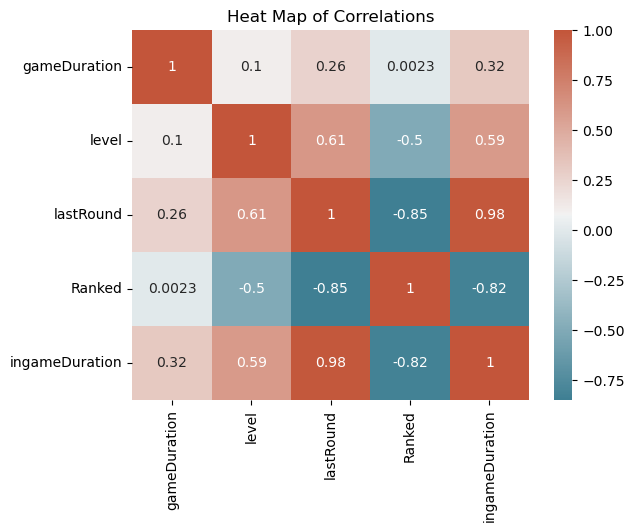

In [17]:
# calculate correlation matrix
corr = myDatabase.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Heat Map of Correlations')

Based on our definition of 'Ranked', the lowest value, integer 1 means the winner/top rank of each play, and 8 means the bottom rank of the play. From the HeatMap above, we can see that there is a positive correlation between lastRound and ingameDuration — the more rounds a player played the more ingameDuration the player has.

C:\Users\User\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Ingame Duration VS. Totoal Rounds of Game')

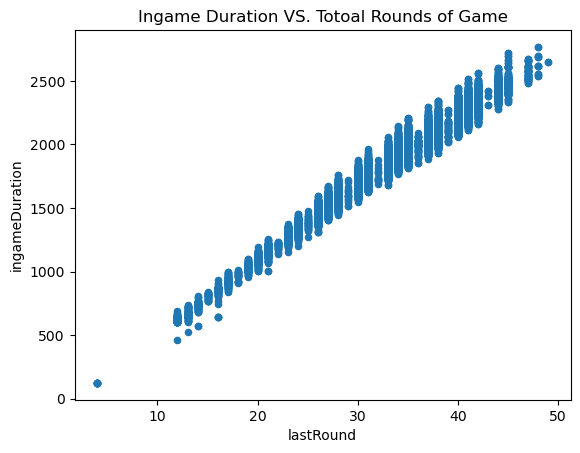

In [18]:
myDatabase.plot(kind='scatter', x='lastRound', y='ingameDuration')
plt.title('Ingame Duration VS. Totoal Rounds of Game')

The above shows the positive correlation between the lastRound and ingameDuration mentioned in the above heatmap

Text(0.5, 1.0, 'Frequenct VS. Ranked Level')

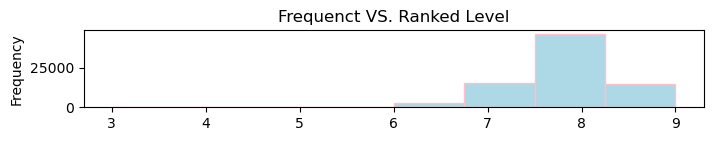

In [19]:
myDatabase['level'].plot(kind='hist', bins=8, figsize=(8,1), facecolor='lightblue',edgecolor='pink')
plt.title('Frequenct VS. Ranked Level')

The about count plot shows the frequency of each level at the end of plays

## Task 2: Set up an 'Analysis Pipeline'

In [20]:
df=myDatabase.drop(["gameId","gameDuration","level","lastRound","ingameDuration"], axis="columns")
df=df.drop(df[df.Ranked!=1].index)
df=df.reset_index()
df.head()

,index,Ranked,combination,champion,champion_list
0,0,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
1,8,1,"{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat...","{'KhaZix': {'items': [57], 'star': 2}, 'KaiSa'...","{'KhaZix': {'items': [57], 'star': 2}, 'KaiSa'..."
2,16,1,"{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat...","{'Zoe': {'items': [], 'star': 2}, 'Ahri': {'it...","{'Zoe': {'items': [], 'star': 2}, 'Ahri': {'it..."
3,24,1,"{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':...","{'Poppy': {'items': [], 'star': 2}, 'Mordekais...","{'Poppy': {'items': [], 'star': 2}, 'Mordekais..."
4,32,1,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'...","{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'..."


Check if there is any missing or null data in the dataset

In [21]:
print(pd.isnull(df).values.any())

False


Now below is my final dataset

In [22]:
df

,index,Ranked,combination,champion,champion_list
0,0,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
1,8,1,"{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat...","{'KhaZix': {'items': [57], 'star': 2}, 'KaiSa'...","{'KhaZix': {'items': [57], 'star': 2}, 'KaiSa'..."
2,16,1,"{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat...","{'Zoe': {'items': [], 'star': 2}, 'Ahri': {'it...","{'Zoe': {'items': [], 'star': 2}, 'Ahri': {'it..."
3,24,1,"{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':...","{'Poppy': {'items': [], 'star': 2}, 'Mordekais...","{'Poppy': {'items': [], 'star': 2}, 'Mordekais..."
4,32,1,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'...","{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'..."
...,...,...,...,...,...
9994,79960,1,"{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, '...","{'Fiora': {'items': [5], 'star': 2}, 'Leona': ...","{'Fiora': {'items': [5], 'star': 2}, 'Leona': ..."
9995,79968,1,"{'Blaster': 2, 'Cybernetic': 6, 'Infiltrator':...","{'Fiora': {'items': [27], 'star': 2}, 'Leona':...","{'Fiora': {'items': [27], 'star': 2}, 'Leona':..."
9996,79976,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Graves...","{'Malphite': {'items': [], 'star': 2}, 'Graves..."
9997,79984,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Graves...","{'Malphite': {'items': [], 'star': 2}, 'Graves..."


## Task 3: Method Chaining

#### Step 1

In [23]:
df=(
    pd.read_csv("../data/raw/TFT_GrandMaster_MatchData.csv")
    .drop(["gameId","gameDuration","level","lastRound","ingameDuration"], axis="columns")
    .loc[lambda x: x['Ranked']==1]
    .reset_index()
    .drop(["index"], axis="columns")
    .assign(combination_dict=lambda df:
            df['combination'].apply(lambda x: ast.literal_eval(x)))
    .drop(["combination"], axis="columns")
)
df

,Ranked,champion,combination_dict
0,1,"{'Malphite': {'items': [], 'star': 2}, 'Blitzc...","{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '..."
1,1,"{'KhaZix': {'items': [57], 'star': 2}, 'KaiSa'...","{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat..."
2,1,"{'Zoe': {'items': [], 'star': 2}, 'Ahri': {'it...","{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat..."
3,1,"{'Poppy': {'items': [], 'star': 2}, 'Mordekais...","{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':..."
4,1,"{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'...","{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'..."
...,...,...,...
9994,1,"{'Fiora': {'items': [5], 'star': 2}, 'Leona': ...","{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, '..."
9995,1,"{'Fiora': {'items': [27], 'star': 2}, 'Leona':...","{'Blaster': 2, 'Cybernetic': 6, 'Infiltrator':..."
9996,1,"{'Malphite': {'items': [], 'star': 2}, 'Graves...","{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '..."
9997,1,"{'Malphite': {'items': [], 'star': 2}, 'Graves...","{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, '..."


#### Step 2

In [24]:
import pandas as pd
def load_and_process(url_or_path_to_csv_file):
    import numpy as np
    import pandas as pd
    import matplotlib.pylab as plt
    import seaborn as sns
    import ast

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
        pd.read_csv(url_or_path_to_csv_file)
        .dropna()
        .drop(["gameId","gameDuration","level","lastRound","ingameDuration"], axis="columns")
        .loc[lambda x: x['Ranked']==1]
        .reset_index()
        .drop(["index"], axis="columns")
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
        df1
        .assign(combination_dict=lambda df:
            df['combination'].apply(lambda x: ast.literal_eval(x)))
        .drop(["combination"], axis="columns")
      )

    # Make sure to return the latest dataframe

    return df2 

#### Test function

In [25]:
load_and_process("../data/raw/TFT_GrandMaster_MatchData.csv")

,Ranked,champion,combination_dict
0,1,"{'Malphite': {'items': [], 'star': 2}, 'Blitzc...","{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '..."
1,1,"{'KhaZix': {'items': [57], 'star': 2}, 'KaiSa'...","{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat..."
2,1,"{'Zoe': {'items': [], 'star': 2}, 'Ahri': {'it...","{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat..."
3,1,"{'Poppy': {'items': [], 'star': 2}, 'Mordekais...","{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':..."
4,1,"{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'...","{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'..."
...,...,...,...
9994,1,"{'Fiora': {'items': [5], 'star': 2}, 'Leona': ...","{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, '..."
9995,1,"{'Fiora': {'items': [27], 'star': 2}, 'Leona':...","{'Blaster': 2, 'Cybernetic': 6, 'Infiltrator':..."
9996,1,"{'Malphite': {'items': [], 'star': 2}, 'Graves...","{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '..."
9997,1,"{'Malphite': {'items': [], 'star': 2}, 'Graves...","{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, '..."


In [26]:
import project_functions3 # This is called a relative import
import pandas as pd
df = project_functions3.load_and_process("../data/raw/TFT_GrandMaster_MatchData.csv")
df

,gameId,Ranked,combination,items_dict
0,KR_4254769102,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
1,KR_4260599131,1,"{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat...","{'KhaZix': {'items': [57], 'star': 2}, 'KaiSa'..."
2,KR_4261384056,1,"{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat...","{'Zoe': {'items': [], 'star': 2}, 'Ahri': {'it..."
3,KR_4261386758,1,"{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':...","{'Poppy': {'items': [], 'star': 2}, 'Mordekais..."
4,KR_4261389064,1,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'..."
...,...,...,...,...
9994,KR_4365720412,1,"{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, '...","{'Fiora': {'items': [5], 'star': 2}, 'Leona': ..."
9995,KR_4365731277,1,"{'Blaster': 2, 'Cybernetic': 6, 'Infiltrator':...","{'Fiora': {'items': [27], 'star': 2}, 'Leona':..."
9996,KR_4365750755,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Graves..."
9997,KR_4365751627,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Graves..."


## Task 4: Conduct Analysis

Based on the above EDA analysis, it is clear that the item numbered 15(B.F.Sword) has the highest frequency among all of the items used in the combinations by TFT players at grand master level. Based on this useful finding, players may prefer to choose B.F. sword as their first item in ordr to win the play.

In [29]:
items = frequency.keys()
freqs = frequency.values()
#new_df = pd.DataFrame(frequency)

#sns.histplot(data=penguins, x="flipper_length_mm", kde=True)
#new_df
print(frequency)


Counter({15: 44704, 19: 30714, 69: 29328, 29: 28716, 37: 28031, 36: 27405, 44: 25332, 57: 25215, 12: 23712, 67: 21146, 46: 20387, 14: 18600, 33: 18362, 45: 17812, 47: 16954, 55: 16902, 23: 16579, 22: 15234, 27: 14272, 79: 14260, 66: 12808, 39: 12079, 34: 11687, 26: 11548, 49: 11454, 99: 11238, 25: 11202, 13: 10637, 17: 10416, 35: 10150, 24: 9896, 16: 8932, 4: 8363, 59: 8130, 77: 7978, 2: 7880, 38: 7302, 3: 6826, 56: 6396, 11: 6013, 7: 5753, 1: 5610, 28: 5419, 88: 5252, 6: 5207, 68: 5106, 5: 4743, 48: 4443, 58: 3929, 78: 3713, 9: 3552, 18: 3042, 89: 2631, 8: 1168, 10006: 2})


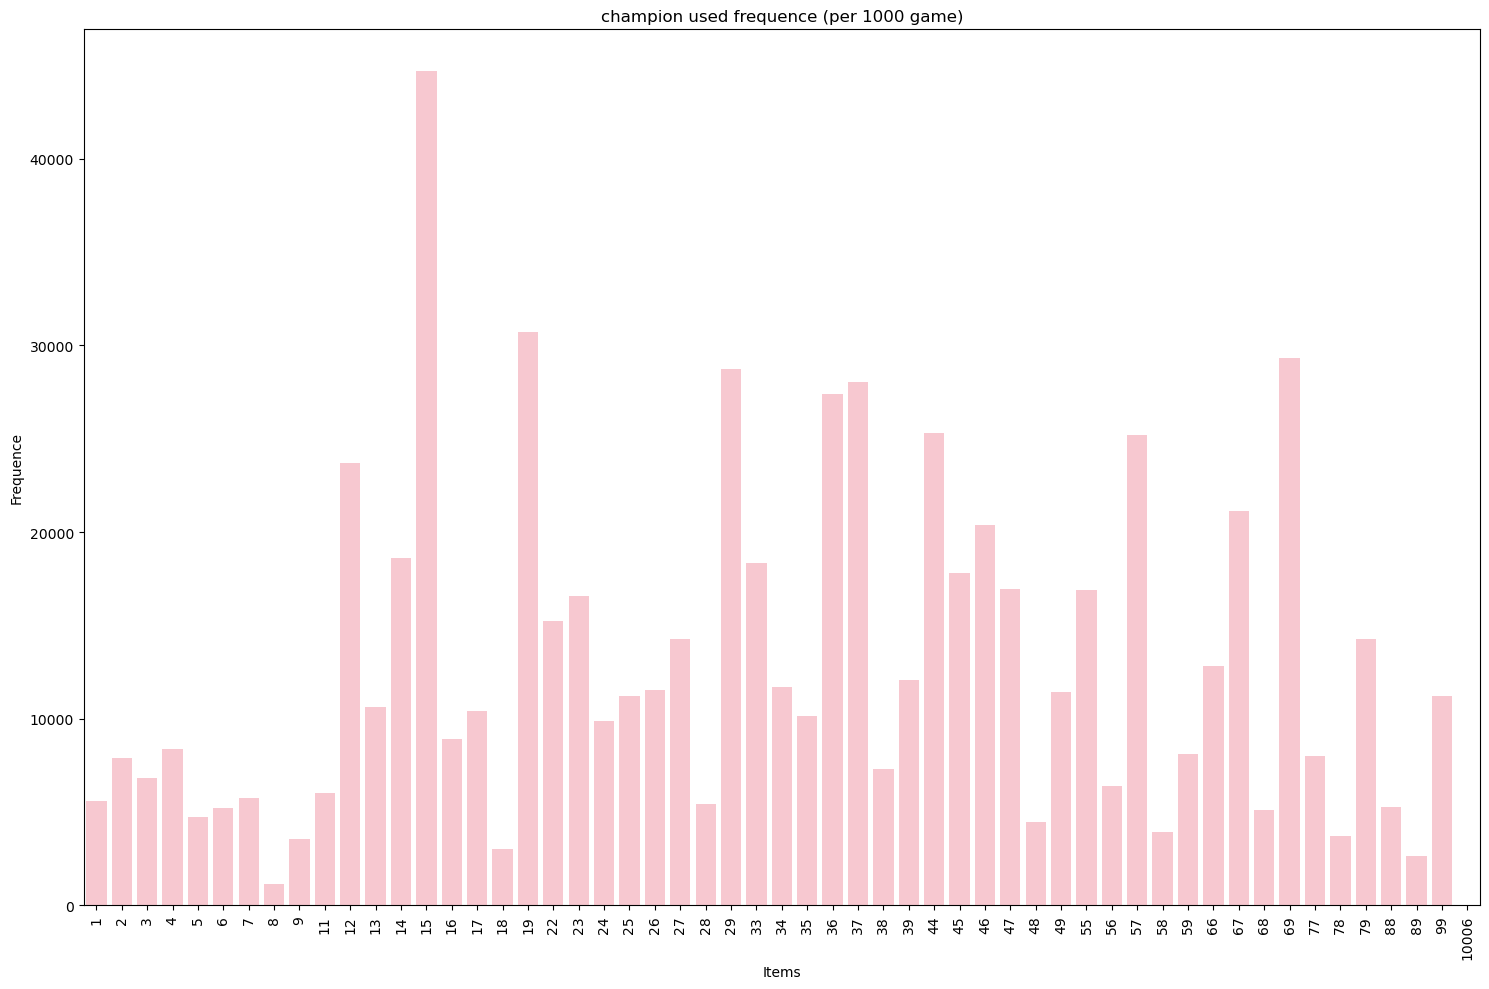

In [37]:
fig, ax = plt.subplots()
items = frequency.keys()
freqs = frequency.values()
df = pd.DataFrame({'Items': items,'Frequence':freqs})
df.to

plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

df['Items'].value_counts().plot(ax=ax, kind='bar', xlabel='Items', ylabel='Frequency')
plotFinal = sns.barplot(data=df, x = 'Items', y = 'Frequence', color='pink').set(title = 'champion used frequence (per 1000 game)')

plt.show()


From the above figure, it is clear that the 15th item has the highest frequency, and the 19th item is the second most commonly used item in the TFT game.